In [1]:
import os
import pandas as pd
import geopandas as gpd

# os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
local_crs = 32636
# path to data
example_data_path = "./data"

In [2]:
# load aggregated info we have
aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

In [3]:
# load data required for service graphs creation
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet")).rename_geometry('geometry')

hospitals = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
pharmacies = gpd.read_file(os.path.join(example_data_path, "pharmacies.geojson"))
policlinics = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"kindergartens": kindergartens}

In [4]:
# services = {"schools": schools, "kindergartens": kindergartens, "recreational_areas": recreational_areas,
#             "hospitals": hospitals, "pharmacies": pharmacies, "policlinics": policlinics}

In [5]:
from masterplan_tools import CityModel

city_model = CityModel(
  blocks=aggregated_blocks, 
  accessibility_matrix=accessibility_matrix, 
  services=services
)

/Users/mvin/Desktop/masterplanning/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
city_model.services_graph.nodes[17]

{'population': 6026.0,
 'is_living': True,
 'id': 17,
 'is_kindergartens_service': 1,
 'kindergartens_capacity': 245,
 'provision_kindergartens': 0,
 'id_kindergartens': 0,
 'population_prov_kindergartens': 0,
 'population_unprov_kindergartens': 6026.0}

In [7]:
# city_model.visualize()

In [8]:
from masterplan_tools import ProvisionModel

services_prov = {}

for service_type in city_model.get_service_types():
    provision = ProvisionModel(city_model=city_model, service_name=service_type)
    services_prov[service_type] = provision.run(overflow=True)
    print(service_type)

total load = 12709.655
total capacity = 10459
fin
2698
4948.655000000001
308
kindergartens


In [9]:

services_prov["kindergartens"]["population_prov_kindergartens"].sum()


7761

In [10]:
services_prov["kindergartens"]['population_unprov_kindergartens'].sum()

4970

In [11]:
services_prov["kindergartens"][services_prov["kindergartens"]['provision_kindergartens'] > 0]

,geometry,landuse,block_id,is_living,current_population,floors,current_living_area,current_green_capacity,current_green_area,current_parking_capacity,current_industrial_area,area,provision_kindergartens,population_prov_kindergartens,population_unprov_kindergartens,small_prov_kindergartens,population
15,"POLYGON ((344864.533 6647854.355, 344855.596 6...",buildings,15,True,3375.0,1.0,11360.040,0.0,0.0,3004.0,3427.28270,65429.054626,100,207,-1,0,3375
16,"POLYGON ((344272.022 6648285.316, 344278.598 6...",buildings,16,True,3946.0,3.5,19338.336,4095.0,1900.0,44.0,7108.81950,102276.415413,68,166,74,0,3946
17,"POLYGON ((344477.431 6648686.065, 344490.134 6...",buildings,17,True,6026.0,2.0,32985.934,71444.0,43427.0,2911.0,30788.58880,338912.554925,100,369,-1,0,6026
18,"POLYGON ((344059.128 6648753.606, 344059.172 6...",buildings,18,True,4222.0,1.0,19467.875,12479.0,11708.0,128.0,8921.20723,158850.983702,64,167,90,0,4222
20,"POLYGON ((344542.320 6648943.596, 344542.403 6...",buildings,20,True,5956.0,9.0,31287.166,41360.0,7509.0,0.0,6385.50440,248549.074482,100,364,0,0,5956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,"POLYGON ((346988.642 6647733.498, 346995.048 6...",selected_area,325,True,118.0,4.5,1364.164,0.0,0.0,0.0,0.00000,2670.520136,100,15,-7,0,118
338,"POLYGON ((346949.808 6649652.586, 346949.562 6...",selected_area,338,True,71.0,1.5,667.147,0.0,0.0,0.0,58748.38326,108919.295751,100,6,-1,0,71
345,"POLYGON ((347453.321 6648682.033, 347460.150 6...",selected_area,345,True,34.0,0.0,234.938,0.0,0.0,0.0,8543.41300,12372.147877,100,4,-1,0,34
349,"POLYGON ((347767.514 6648786.017, 347767.265 6...",selected_area,349,True,81.0,4.0,1164.096,0.0,0.0,0.0,4244.02400,7699.668651,100,6,-1,0,81


In [12]:
prov1 = services_prov["kindergartens"]


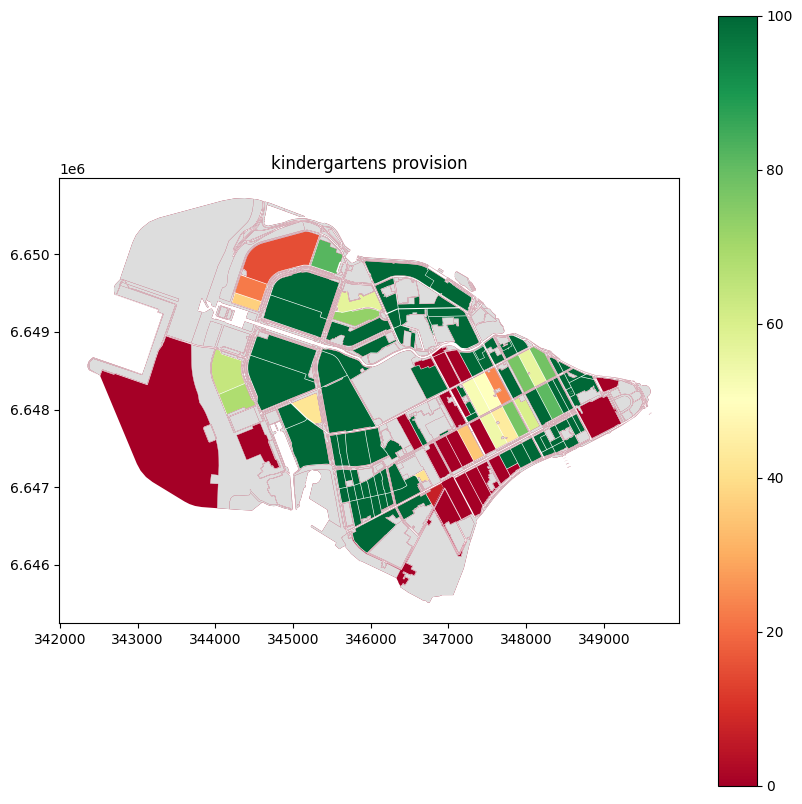

In [13]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
services_prov["kindergartens"].plot(column="provision_kindergartens", legend=True, ax=ax1, cmap='RdYlGn')
ax1.set_title('kindergartens provision')
services_prov["kindergartens"][services_prov["kindergartens"]["population"] == 0].plot(ax=ax1, color="#ddd", alpha=1)

plt.show()


In [14]:
city_model.services_graph.nodes[224]

{'population': 2556.0,
 'is_living': True,
 'id': 224,
 'is_kindergartens_service': 1,
 'provision_kindergartens': 0,
 'id_kindergartens': 0,
 'kindergartens_capacity': 280,
 'population_prov_kindergartens': 0,
 'population_unprov_kindergartens': 2556.0}

In [15]:
# updated_block = {
#  'population': 30000.0,
#  'kindergartens_capacity': 300,
#  'block_id': 224,
#  "is_kindergartens_service": 1}

In [16]:
updated_block = {'block_id': 224,
  'population': 30,
  'kindergartens_capacity': 500000}

In [17]:
graph_base = city_model.services_graph.copy()
graph = graph_base.copy()

if updated_block['block_id'] in graph.nodes:
    for attr_name, attr_value in updated_block.items():
        if attr_name in graph.nodes[updated_block['block_id']]:
            graph.nodes[updated_block['block_id']][attr_name] += attr_value

city_model.services_graph = graph

services_prov = {}
for service_type in city_model.get_service_types():
    provision = ProvisionModel(city_model=city_model, service_name=service_type)
    services_prov[service_type] = provision.run(overflow=True)
    print(service_type)

print(city_model.services_graph.nodes[224])
city_model.services_graph = graph_base

total load = 12711.485
total capacity = 510459
fin
502568
4820.485000000001
308
kindergartens
{'population': 2586.0, 'is_living': True, 'id': 224, 'is_kindergartens_service': 1, 'provision_kindergartens': 0, 'id_kindergartens': 0, 'kindergartens_capacity': 500280, 'population_prov_kindergartens': 0, 'population_unprov_kindergartens': 2556.0}


In [18]:
services_prov["kindergartens"]["population_prov_kindergartens"].sum()

7891

In [19]:
services_prov["kindergartens"]['population_unprov_kindergartens'].sum()

4845

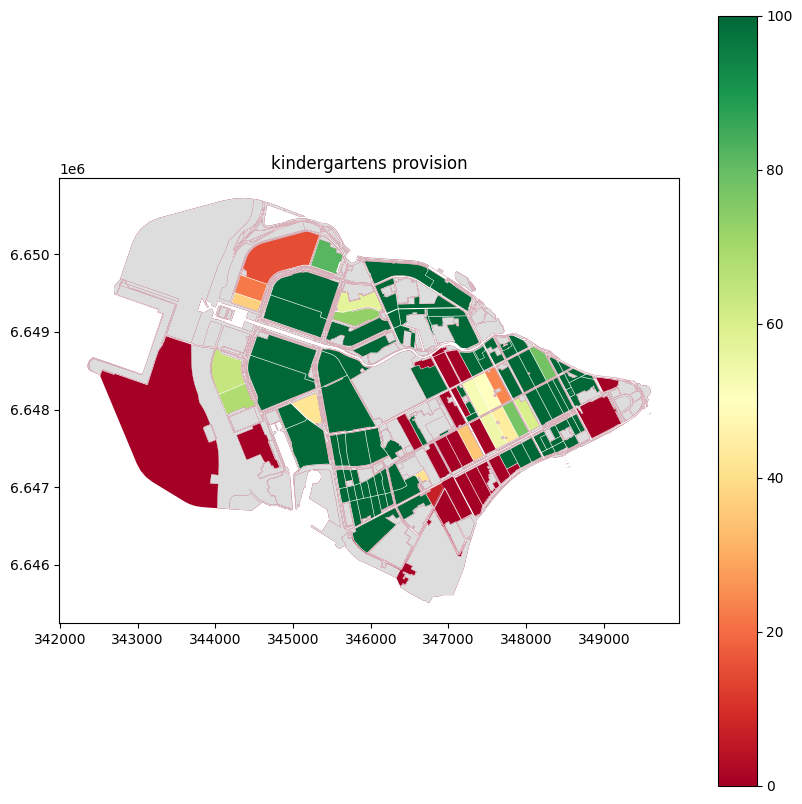

In [20]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
services_prov["kindergartens"].plot(column="provision_kindergartens", legend=True, ax=ax1, cmap='RdYlGn')
ax1.set_title('kindergartens provision')
services_prov["kindergartens"][services_prov["kindergartens"]["population"] == 0].plot(ax=ax1, color="#ddd", alpha=1)

plt.show()

In [21]:
prov2 = services_prov["kindergartens"]

In [22]:
df_filtered_1 = services_prov["kindergartens"][services_prov["kindergartens"]["provision_kindergartens"] > 0]
kindergartens_all = df_filtered_1["provision_kindergartens"].sum(numeric_only=True) / len(df_filtered_1)
print(f"Total provision before {kindergartens_all}")

Total provision before 90.21153846153847
